# Data & Things

## Lecture : IoT and Data

# Simulate sensor data & apply PCA

In this exercise, you will do the following:
1. Simulate sensor data
2. Apply PCA to simulated data
3. Simulate a new point
4. Find out which region the new point belongs to

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Step 1 Simulate synthetic predictive maintenance dataset
np.random.seed(42)
time_steps = 10000

sensors = {}
for i in range(1, 21):
    sensors[f'Sensor{i}'] = np.linspace(50, 100, time_steps) + np.random.normal(0, 20, time_steps)

# Combine into a DataFrame
data = pd.DataFrame(sensors)

print("Sample Data:")
print(data.head())

Sample Data:
     Sensor1    Sensor2    Sensor3    Sensor4    Sensor5    Sensor6  \
0  59.934283  36.430105  56.965725  10.388561  40.562849  51.964123   
1  47.239714  43.895011  55.671472  28.905288  70.259050  48.722836   
2  62.963772  38.062380  31.279604  38.269433  46.046264  69.045816   
3  80.475599  52.223362  61.606686  53.008380  51.826387  80.671624   
4  45.336935  73.963573  20.218348  70.503249  64.367814  63.756941   

     Sensor7    Sensor8    Sensor9   Sensor10   Sensor11   Sensor12  \
0  51.576755  56.403048  63.280022  69.217891  70.611892  66.017477   
1  61.262950  72.314233  44.082680  42.605706  26.897905  49.021813   
2  56.832040  19.905237  48.678273  38.418383  61.518745  41.079748   
3  24.456718  84.807115  46.507354  68.681245  37.630232  53.375301   
4  46.295596  56.621738  60.301076  -4.610793  43.471946   7.484493   

    Sensor13   Sensor14   Sensor15   Sensor16   Sensor17   Sensor18  \
0  45.626995  72.350652  44.689254  77.397560  78.652455  13.5

In [6]:
# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display scaled data
print("Scaled Data Sample:")
print(pd.DataFrame(scaled_data, columns=data.columns).head())

Scaled Data Sample:
    Sensor1   Sensor2   Sensor3   Sensor4   Sensor5   Sensor6   Sensor7  \
0 -0.610580 -1.566006 -0.725010 -2.596654 -1.407431 -0.927666 -0.969437   
1 -1.126525 -1.265030 -0.777771 -1.850742 -0.198347 -1.057996 -0.572396   
2 -0.487452 -1.500195 -1.772111 -1.473524 -1.184173 -0.240819 -0.754021   
3  0.224281 -0.929241 -0.535820 -0.879792 -0.948835  0.226649 -2.081098   
4 -1.203859 -0.052701 -2.223025 -0.175043 -0.438209 -0.453482 -1.185914   

    Sensor8   Sensor9  Sensor10  Sensor11  Sensor12  Sensor13  Sensor14  \
0 -0.746813 -0.479506 -0.232249 -0.186682 -0.367113 -1.184181 -0.110562   
1 -0.106939 -1.258090 -1.320570 -1.955170 -1.054209 -0.697301 -0.772550   
2 -2.214587 -1.071707 -1.491814 -0.554553 -1.375289 -0.412171 -0.701019   
3  0.395468 -1.159753 -0.254195 -1.520984 -0.878208 -1.964016 -1.982653   
4 -0.738018 -0.600323 -3.251518 -1.284652 -2.733470 -0.924990 -0.686938   

   Sensor15  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  
0 -1.220616  0

## Do the following tasks:
1. Apply PCA with upto 5 components
2. Visualize how much variance of the dataset is defined by each component
3. Visualize the first 2 principal components and color them by timestep
4. Simulate a new position using code below
5. Plot the new point in the original 2D PCA graph

### 1. Apply PCA with upto 5 components

In [7]:
# Apply PCA to the standardized data with 5 components
pca = PCA(n_components=5)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.37687365 0.0359165  0.03507436 0.03489235 0.03428399]


### 2. Visualize how much variance of the dataset is defined by each component


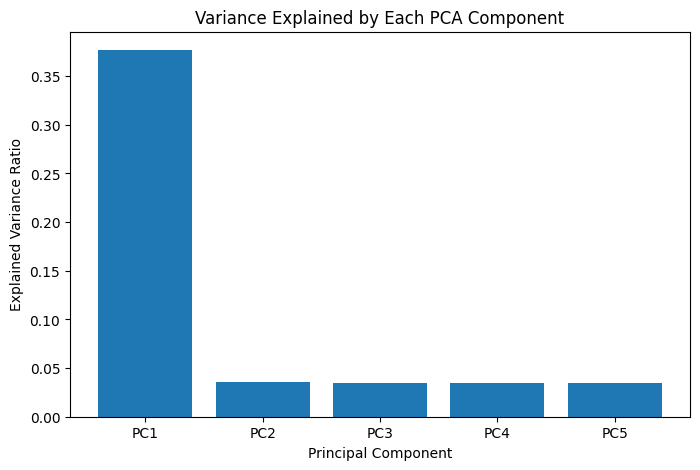

In [8]:
# Plot the explained variance ratio for each of the 5 components
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), pca.explained_variance_ratio_, tick_label=[f'PC{i}' for i in range(1, 6)])
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Explained by Each PCA Component")
plt.show()

### 3. Visualize the first 2 principal components and color them by timestep


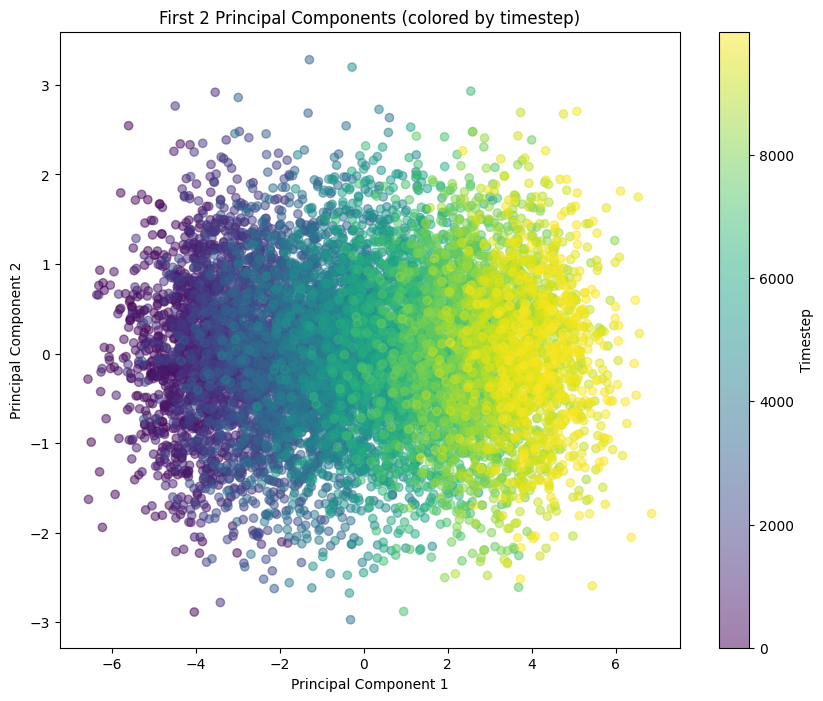

In [9]:
# Create a time vector for color mapping (assuming 10,000 timesteps)
timesteps = np.arange(time_steps)

# Plot the first 2 principal components with points colored by timestep
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=timesteps, cmap='viridis', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("First 2 Principal Components (colored by timestep)")
plt.colorbar(label="Timestep")
plt.show()


### 4. Simulate a new position using code below


In [10]:
# Simulate a new sensor reading for 20 sensors
new_sensor = np.linspace(50, 100, 20) + np.random.normal(0, 20, 20)

# Scale the new sensor reading using the previously fitted scaler
new_sensor_scaled = scaler.transform(new_sensor.reshape(1, -1))

# Project the new sensor reading into PCA space using the trained PCA
new_point = pca.transform(new_sensor_scaled)
print("New point in PCA space:", new_point)


New point in PCA space: [[-0.9884942   0.59057597  0.93806629  0.20740917 -0.65137109]]


c:\Users\Jlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 5. Plot the new point in the original 2D PCA graph

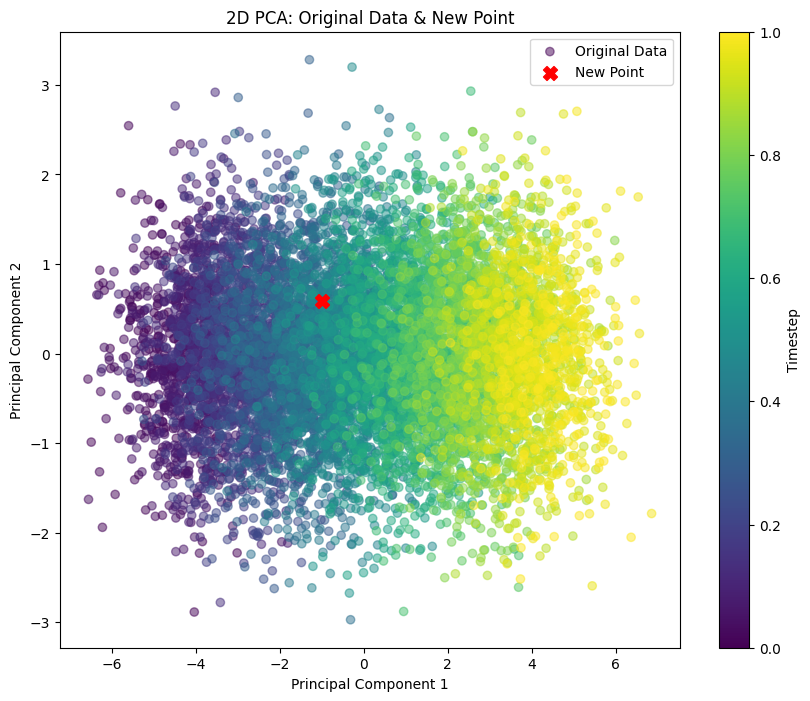

In [11]:
plt.figure(figsize=(10, 8))
# Plot original data in the 2D PCA space (first two PCs)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=timesteps, cmap='viridis', alpha=0.5, label="Original Data")
# Overlay the new point (marked with a red 'X')
plt.scatter(new_point[0, 0], new_point[0, 1], color='red', s=100, marker='X', label="New Point")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA: Original Data & New Point")
plt.colorbar(label="Timestep")
plt.legend()
plt.show()
